# Rotated Ellipse Reconstruction

In [10]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [11]:
dataSize = 200

theta = np.random.rand(dataSize) * 2 * np.pi
rx = np.random.normal(3, 0.1, dataSize)
ry = np.random.normal(6, 0.1, dataSize)

# generate points close to a ellipse
x = rx * np.cos(theta)
y = ry * np.sin(theta)

# rotate pi/6
rotAngle = np.pi / 6
rot = np.array([
    [np.cos(rotAngle), -np.sin(rotAngle)],
    [np.sin(rotAngle), np.cos(rotAngle)]
])

x, y = np.dot(rot, np.array([x, y]))

# center : (3, 5)
x += 3
y += 5

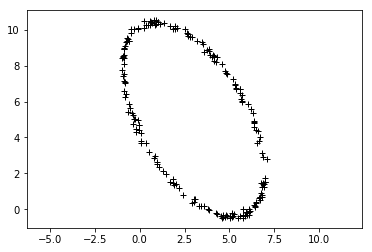

In [12]:
plt.plot(x, y, 'k+')
plt.axis('equal')
plt.show()

In [13]:
# modeling
# x^2 + a*y^2 + b*x + c*y + d*x*y + e = 0
mat = np.zeros((dataSize, 5))
mat[:, 0] = y * y
mat[:, 1] = x
mat[:, 2] = y
mat[:, 3] = x * y
mat[:, 4] = 1

const = -(x * x)
const = const.reshape((dataSize, 1))

In [14]:
pseudo_inv = np.linalg.pinv(mat)
a, b, c, d, e = np.dot(pseudo_inv, const)

(-1.0012913569360391,
 7.081870621365657,
 -0.48624511330954689,
 10.530006632624858)

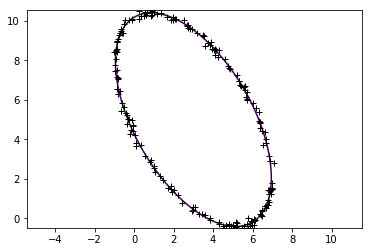

In [15]:
xx = np.linspace(min(x), max(x), 1000)
yy = np.linspace(min(y), max(y), 1000)
[X, Y] = np.meshgrid(xx, yy)
Z = X*X + a*Y*Y + b*X + c*Y + d*X*Y + e

ax = plt.gca()
ax.cla()
ax.plot(x, y, 'k+')
ax.contour(X, Y, Z, [0], color='r')
ax.axis('equal')